# 迴歸問題

## 郭耀仁

## 迴歸問題有哪些？

- 利用月收入來核定信用卡額度
- 利用坪數、房間數來預測房價
- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- ...etc.

## 大家都在尋找 $f$

$$y = f(x)$$

- 但沒有人知道 $f$ 到底為何、是否存在？我們只能假設：

$$\hat{y} = h(x)$$

## 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們更有自信地說 $h$ 跟 $f$ 愈相似

- 成本函數

$$ \text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 將 $h$ 表示得更完整：只有一個觀測值的時候

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$y = h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## 將 $h$ 表示得更完整：有 n 個觀測值的時候

\begin{eqnarray}
h(X) = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n X_n \\
\end{eqnarray}

$$Y = h(X) = 
\begin{bmatrix} x_{01}, x_{02}, ..., x_{0n} \\ x_{11}, x_{12}, ..., x_{1n} \\.\\.\\.\\ x_{n1}, x_{n2}, ..., x_{nn}
\end{bmatrix}
\begin{bmatrix} \theta_0 \\ \theta_1 \\.\\.\\.\\ \theta_n \end{bmatrix} = X\theta$$

## 玩具資料


$$
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([2, 2, 4])
plt.scatter(x, y, color='k')
plt.xlim(0, 4)
plt.ylim(0.5, 5)

(0.5, 5)

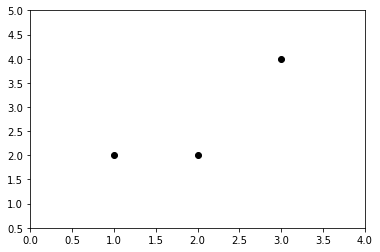

In [2]:
plt.show()

## 任務

- 找到一組 $\theta$ 讓成本函數最小化

In [3]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), Y_train)
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]

f = lambda x : theta_0 + theta_1*x
xfit = np.arange(0,4,0.01)
yfit = f(xfit)

plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.xlabel('x')
plt.ylabel('y')

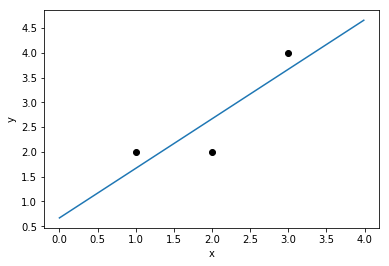

In [4]:
plt.show()

## 完成任務的方法

- Normal Equation
- Gradient Descent

## Normal Equation

## 線性聯立方程組

\begin{eqnarray}
\theta_0 + \theta_1 &=& 2 \nonumber \\
\theta_0 + 2 \theta_1 &=& 2 \nonumber \\
\theta_0 + 3 \theta_1 &=& 4 \nonumber \\
\end{eqnarray}

## 以向量與矩陣表示

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 
\end{bmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}
\end{equation}

## 如果 $X^TX$ 可逆

\begin{eqnarray}
X\theta = Y \\
\theta = (X^T X)^{-1} X^T Y
\end{eqnarray}

## 獲得 $\theta$ 的推導過程源自於成本函數的最小化

\begin{eqnarray}
\text{minimize:} \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2 \\
J(\theta) = \frac{1}{2m}(X\theta - Y)^T(X\theta - Y) \\
J(\theta) = \frac{1}{2m}[(X\theta)^T - Y^T)(X\theta - Y)] \\
J(\theta) = \frac{1}{2m}[(X\theta)^TX\theta - (X\theta)^TY - Y^T(X\theta) + Y^TY] \\
J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2(X\theta)^TY + Y^TY] \\
\frac{\partial J}{\partial \theta} = \frac{1}{2m}[2X^TX\theta - 2X^TY] = 0 \\
X^TX\theta = X^TY \\
\theta = (X^T X)^{-1} X^T Y
\end{eqnarray}

In [5]:
import numpy as np

x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
X_train

array([[1],
       [2],
       [3]])

In [6]:
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
Y_train

array([[2],
       [2],
       [4]])

In [7]:
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
X_train

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [8]:
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), Y_train)

In [9]:
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Theta")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))

讓成本函數最小的 Theta
Theta_0:0.6667, Theta_1:1.0000


## 隨堂練習：將利用 Normal Equation 求解的過程寫成函數

```python
def simple_linear_regression_fit(x, y):
    # ...
```

## 隨堂練習：利用 simple_linear_regression_fit() 求解後將 $y = \theta_0 + \theta_1x$ 畫出

In [10]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
LHS = np.dot(np.transpose(X_train), X_train)
RHS = np.dot(np.transpose(X_train), Y_train)
thetas = np.dot(np.linalg.inv(LHS), RHS)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]

f = lambda x : theta_0 + theta_1*x
xfit = np.arange(0,4,0.01)
yfit = f(xfit)

plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.xlabel('x')
plt.ylabel('y')

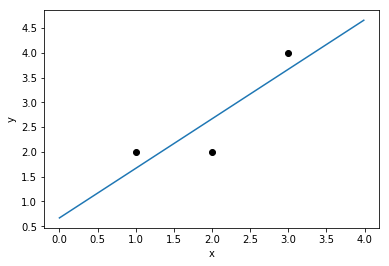

In [11]:
plt.show()

## Gradient Descent

## $h(x)$：

$$h(x) = \theta_0 + \theta_1x_1$$

## 先簡化成只有 $\theta_1$：

$$h(x) = \theta_1x_1$$

## 在 $0 < \theta_1 < 2$ 之間打點來計算成本函數 $J(\theta_1)$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Cost Function Visualized")

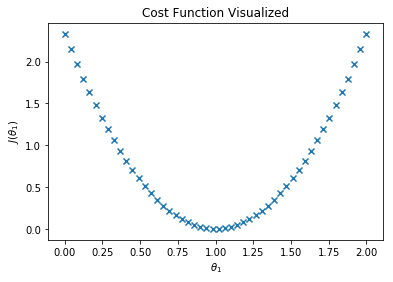

In [13]:
plt.show()

## 假如我們的運氣不好，在一個沒有包含 $\theta_1$ 的區間尋找怎麼辦？

## 透過很聰明的方式：Gradient Descent

> 每組 $\theta_1$ 所得的成本函數偏微分取得斜率，利用這個斜率逐步取得局部最佳解。

$$\theta_1 := \theta_1 - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.plot(1.75, cost_function(1.75, x, y), marker = 'D', markersize = 12, color = 'y')
plt.plot(0.5, cost_function(0.5, x, y), marker = 'o', markersize = 12, color = 'g')
plt.plot(1, cost_function(1, x, y), marker = '^', markersize = 12, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Gradient Descent with $\\theta_1$")

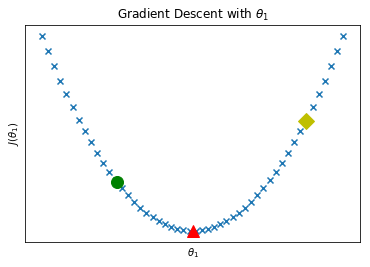

In [15]:
plt.show()

## 如何做修正

- $\theta_1 = 0.5$ 的時候（綠圓點），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為負值，所以 $\theta_1$ 會向右邊修正
- $\theta_1 = 1.75$ 的時候（黃方塊），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為正值，所以 $\theta_1$ 會向左邊修正
- $\theta_1 = 1.0$ 的時候（紅三角），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為零，$\theta_1$ 收斂

## $\theta_1$ 修正的速度與 $\alpha$ 相關，$\alpha$ 稱為學習速率

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r', lw = 0)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("Optimal Gradient Descent")

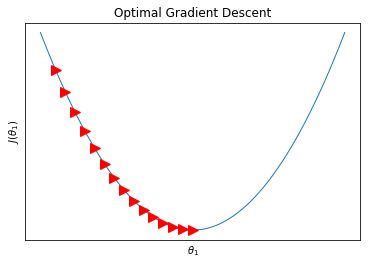

In [17]:
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.05, 1, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 6, color = 'r')
plt.xticks([]), plt.yticks([])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too small")

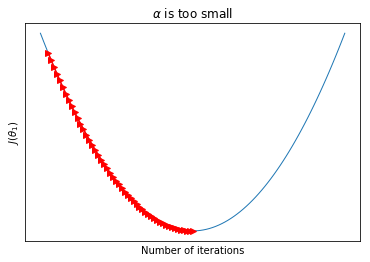

In [19]:
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.xticks([]), plt.yticks([])
plt.title("$\\alpha$ is too large")

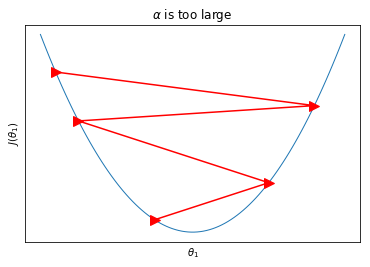

In [21]:
plt.show()

## 怎麼挑選學習速率

- 如果學習速率夠小，成本函數每一次都會下降
- 學習速率太小，收斂的速度太慢
- 學習速率太大，可能會無法收斂

In [22]:
import numpy as np

def compute_cost(X, Y, thetas = np.array([0, 0]).reshape(2, 1)):
    m = Y.shape[0]
    J = 0
    h = X.dot(thetas)
    J = 1/(2*m)*np.sum(np.square(h-Y))
    
    return(J)

In [23]:
x_train = np.array([1, 2, 3])
X_train = x_train.reshape(len(x_train), 1)
y_train = np.array([2, 2, 4])
Y_train = y_train.reshape(len(y_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)

compute_cost(X_train, Y_train)

4.0

In [24]:
def gradient_descent(X, Y, alpha=0.01, num_iters=1500):
    thetas = np.array([0, 0]).reshape(2, 1)
    m = Y.shape[0]
    J_history = np.zeros(num_iters)
    
    for num_iter in range(num_iters):
        h = X.dot(thetas)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        thetas = thetas - alpha * gradient
        J_history[num_iter] = compute_cost(X, Y, thetas=thetas)
    return thetas, J_history

In [25]:
import numpy as np

X_train = np.array([1, 2, 3])
X_train = X_train.reshape(len(X_train), 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)

thetas , cost_J = gradient_descent(X_train, Y_train)
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
print("讓成本函數最小的 Thetas")
print("Theta_0:{:.4f}, Theta_1:{:.4f}".format(theta_0, theta_1))
plt.plot(cost_J)
plt.ylabel(r"$J(\theta)$")
plt.xlabel('Iterations')

讓成本函數最小的 Thetas
Theta_0:0.6354, Theta_1:1.0138


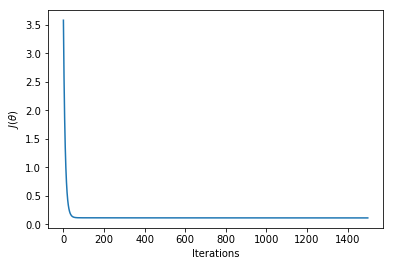

In [26]:
plt.show()

## Phew...

- 總算完成了兩種找到 $\theta$ 的方式！
- 這是不能忽略的學習步驟，但並不是實作上要採用的

## 有哪些模組可以幫我們找到 $\theta$

- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [scikit-learn](http://scikit-learn.org/stable/)
- [TensorFlow](https://www.tensorflow.org/)

## statsmodel

In [27]:
print(X_train)
print(Y_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[2]
 [2]
 [4]]


In [28]:
import statsmodels.api as sm

regressor_sm = sm.OLS(Y_train, X_train)
thetas_sm = regressor_sm.fit()
theta_0_sm = thetas_sm.params[0]
theta_1_sm = thetas_sm.params[1]

print("Thetas from statsmodel:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_sm, theta_1_sm))

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Thetas from statsmodel:
theta_0:0.6667, theta_1:1.0000


## scikit-learn

In [29]:
print(X_train)
print(Y_train)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[2]
 [2]
 [4]]


In [30]:
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
thetas_skl = regressor_skl.fit(X_train, Y_train)
theta_0_skl = thetas_skl.intercept_
theta_1_skl = thetas_skl.coef_[0]

print("Thetas from scikit-learn:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_skl[0], theta_1_skl[1]))

Thetas from scikit-learn:
theta_0:0.6667, theta_1:1.0000


## TensorFlow

In [31]:
import tensorflow as tf
import numpy as np

data = np.array([
    [1, 2],
    [2, 2],
    [3, 4]
])
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
theta_1 = tf.Variable(0.0, name="weights")
theta_0 = tf.Variable(0.0, name="bias")
Y_predicted = X * theta_1 + theta_0
loss = tf.square(Y - Y_predicted, name="loss")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1500):
        for x, y in data:
            sess.run(optimizer, feed_dict={X: x, Y:y})
    theta_1_tf, theta_0_tf = sess.run([theta_1, theta_0])

In [32]:
print("Thetas from TensorFlow:")
print("theta_0:{:.4f}, theta_1:{:.4f}".format(theta_0_tf, theta_1_tf))

Thetas from TensorFlow:
theta_0:0.6127, theta_1:1.0352


## 我們建議使用 Scikit-Learn

- 比 StatsModel 完整
- TensorFlow 是自成一格的框架

## 迴歸問題與房屋價格資料

## House Prices: Advanced Regression Techniques

<https://www.kaggle.com/c/house-prices-advanced-regression-techniques>

In [33]:
import pandas as pd

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [34]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 什麼是訓練（train）樣本？

- 訓練樣本用來建立 $h(x)$
- 訓練樣本是 labeled data

## 什麼是驗證（validation）樣本？

- 由訓練樣本中切割出來
    - 通常分出 30% 作為驗證樣本
- 驗證樣本投入 $h(x)$ 產出預測值 $\hat{y}$
- 比對驗證樣本的 $y$ 與 $\hat{y}$ 來評估 $h(x)$ 的績效（performance）

## 什麼是測試（test）樣本？

- 測試樣本是 unlabeled data
- 將測試樣本投入 $h(x)$ 建立預測 $\hat{y}$
- 事後量測績效

## 挑一個變數來預測 SalePrice

`LotArea` 感覺是個合理的 Predictor。

In [36]:
import matplotlib.pyplot as plt

train.plot.scatter("LotArea", "SalePrice", s=5)

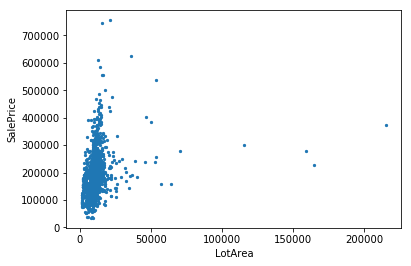

In [37]:
plt.show()

In [38]:
import seaborn as sns

strip = sns.stripplot(x='LotArea', y='SalePrice', data=train, jitter=True)
strip.set(xticklabels=[])

[[]]

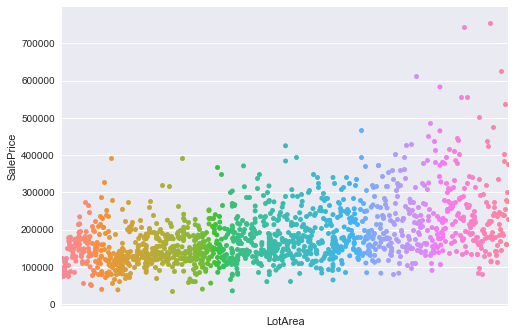

In [39]:
plt.show()

In [40]:
# 切割訓練與驗證樣本
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(train, test_size=0.3, random_state=123)
print(train.shape)
print(train_df.shape)
print(validation_df.shape)

(1460, 81)
(1022, 81)
(438, 81)


In [41]:
# 訓練樣本
Y_train = train_df["SalePrice"].values.reshape(train_df.shape[0], 1)
X_train = train_df["LotArea"].values.reshape(train_df.shape[0], 1)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
print(Y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 2)


In [42]:
# 驗證樣本
Y_validation = validation_df["SalePrice"].values.reshape(validation_df.shape[0], 1)
X_validation = validation_df["LotArea"].values.reshape(validation_df.shape[0], 1)
m = X_validation.shape[0]
ones_col = np.ones((m, 1))
X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(Y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 2)


## 隨堂練習：自己來切割訓練、驗證樣本

- Random seed
- Shuffle
- Subset

```python
def my_train_test_split(train, test_size=0.3, random_state=123)
    # ...
```

In [43]:
# sklearn
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
regressor_skl.fit(X_train, Y_train)
theta_0_skl = regressor_skl.intercept_[0]
theta_1_skl = regressor_skl.coef_[0][1]
print('Thetas from sklearn:\ntheta_0: {:.4f}\ntheta_1: {:.4f}'.format(theta_0_skl, theta_1_skl))

Thetas from sklearn:
theta_0: 157869.1178
theta_1: 2.1443


In [44]:
import matplotlib.pyplot as plt

Y_pred = regressor_skl.predict(X_validation)
plt.scatter(X_validation[:, 1], Y_validation, color="black", s=5)
plt.plot(X_validation[:, 1], Y_pred, color="blue")
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

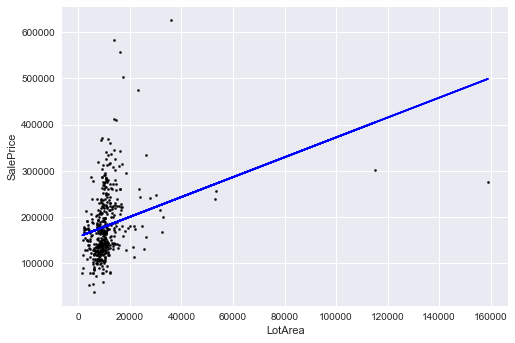

In [45]:
plt.show()

## 評估迴歸模型的指標

- MSE（愈低愈好）

$$MSE = \frac{1}{N}\sum_{i=1}^N(\hat{y_i} - y_i) ^ 2$$

In [46]:
from sklearn.metrics import mean_squared_error

train_MSE= np.mean((Y_train - regressor_skl.predict(X_train))**2)
validation_MSE= np.mean((Y_validation - regressor_skl.predict(X_validation))**2)
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

# sklearn.metrics
print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(Y_train, regressor_skl.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(Y_validation, regressor_skl.predict(X_validation))))

Computation:
Training MSE: 6101508370.9978
Validation MSE: 5323809016.1212

From sklearn.metrics:
Training MSE: 6101508370.9978
Validation MSE: 5323809016.1212


## 隨堂練習：挑兩個變數來預測 SalePrice

- 試試看 `LotArea` 與 `YearBuilt`

In [47]:
import matplotlib.pyplot as plt

train.plot.scatter("YearBuilt", "SalePrice", s=5)

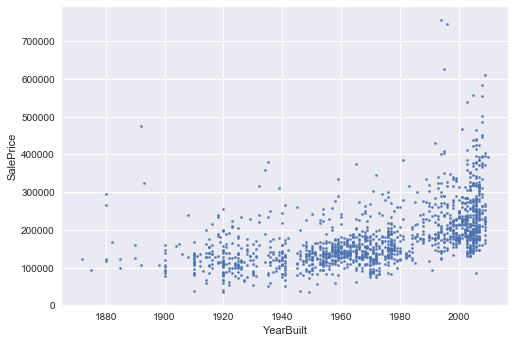

In [48]:
plt.show()

In [49]:
# 訓練樣本
Y_train = train_df["SalePrice"].values.reshape(train_df.shape[0], 1)
X_train = train_df[["LotArea", "YearBuilt"]].values.reshape(train_df.shape[0], 2)
m = X_train.shape[0]
ones_col = np.ones((m, 1))
X_train = np.concatenate((ones_col, X_train), axis=1)
print(Y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 3)


In [50]:
# 驗證樣本
Y_validation = validation_df["SalePrice"].values.reshape(validation_df.shape[0], 1)
X_validation = validation_df[["LotArea", "YearBuilt"]].values.reshape(validation_df.shape[0], 2)
m = X_validation.shape[0]
ones_col = np.ones((m, 1))
X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(Y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 3)


In [51]:
# sklearn
from sklearn import linear_model

regressor_skl = linear_model.LinearRegression()
regressor_skl.fit(X_train, Y_train)
theta_0_skl = regressor_skl.intercept_[0]
theta_1_skl = regressor_skl.coef_[0][1]
theta_2_skl = regressor_skl.coef_[0][2]

In [52]:
print('Thetas from sklearn:\ntheta_0: {:.4f}\ntheta_1: {:.4f}\ntheta_2: {:.4f}'.format(theta_0_skl, theta_1_skl, theta_2_skl))

Thetas from sklearn:
theta_0: -2545020.3324
theta_1: 2.0331
theta_2: 1372.4599


In [53]:
from sklearn.metrics import mean_squared_error

train_MSE= np.mean((Y_train - regressor_skl.predict(X_train))**2)
validation_MSE= np.mean((Y_validation - regressor_skl.predict(X_validation))**2)

In [54]:
print("Computation:")
print("Training MSE: {:.4f}".format(train_MSE))
print("Validation MSE: {:.4f}".format(validation_MSE))

# sklearn.metrics
print("\nFrom sklearn.metrics:")
print("Training MSE: {:.4f}".format(mean_squared_error(Y_train, regressor_skl.predict(X_train))))
print("Validation MSE: {:.4f}".format(mean_squared_error(Y_validation, regressor_skl.predict(X_validation))))

Computation:
Training MSE: 4336328849.1632
Validation MSE: 3777135935.3723

From sklearn.metrics:
Training MSE: 4336328849.1632
Validation MSE: 3777135935.3723


## 使用有 d 次項的 X 來建立 h

## LotArea 與 YearBuilt 看起來都不太像 simple linear regression

$$ y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + ... + \theta_d x_i^d $$

In [91]:
# 訓練樣本
Y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
#m = X_train.shape[0]
#ones_col = np.ones((m, 1))
#X_train = np.concatenate((ones_col, X_train), axis=1)
print(Y_train.shape)
print(X_train.shape)

(1022, 1)
(1022, 1)


In [92]:
# 驗證樣本
Y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)
#m = X_validation.shape[0]
#ones_col = np.ones((m, 1))
#X_validation = np.concatenate((ones_col, X_validation), axis=1)
print(Y_validation.shape)
print(X_validation.shape)

(438, 1)
(438, 1)


## 使用 `PolynomialFeatures(d)` 與 `fit_transform()` 建立 X

In [93]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures(3).fit_transform(X_train)[0, :]

array([1.00000000e+00, 1.99600000e+03, 3.98401600e+06, 7.95209594e+09])

In [94]:
X_train[0, :]

array([1996])

In [95]:
def make_features(train_set, validation_set, degrees):
    train_dict = {}
    validation_dict = {}
    for d in degrees:
        traintestdict = {}
        train_dict[d] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1, 1))
        validation_dict[d] = PolynomialFeatures(d).fit_transform(validation_set.reshape(-1, 1))
    return train_dict, validation_dict

In [96]:
degrees = range(11)
train_dict, validation_dict = make_features(X_train, X_validation, degrees)

## 隨堂練習：將不同次方項的 validation error(MSE) 算出來，並找出 error 最小的次方

```python
def get_best_degree():
    error_train = np.empty(len(degrees))
    error_validation = np.empty(len(degrees))
    # ...
```

In [105]:
def get_best_degree():
    error_train = np.empty(len(degrees))
    error_validation = np.empty(len(degrees))
    for d in degrees:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        #set up model
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, Y_train)
        #predict
        #your code here
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        #calculate mean squared error
        error_train[d] = mean_squared_error(Y_train, prediction_on_training)
        error_validation[d] = mean_squared_error(Y_validation, prediction_on_validation)
    return np.argmin(error_validation), error_validation, error_train

In [106]:
best_degree, error_validation, error_train = get_best_degree()

print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[5.74773085e+09 4.22306392e+09 3.76996972e+09 3.81499577e+09
 3.81482104e+09 3.81463312e+09 3.81443382e+09 3.81422447e+09
 3.81400642e+09 3.81378108e+09 3.81354988e+09]

Error 最低的次方是 2


In [112]:
plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

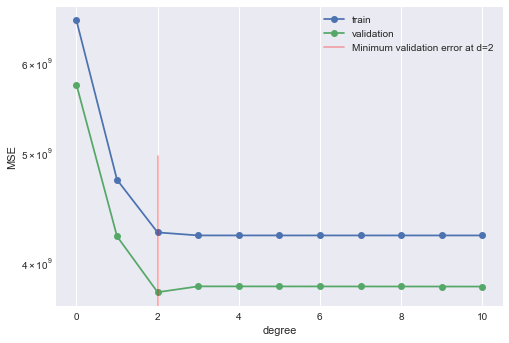

In [113]:
plt.show()

In [158]:
def get_plot():
    d = 2
    X_train = train_dict[d]
    X_validation = validation_dict[d]
    regressor = linear_model.LinearRegression()
    # fitting
    regressor.fit(X_train, Y_train)
    prediction_on_training = regressor.predict(X_train)
    prediction_on_validation = regressor.predict(X_validation)
    x_arr = np.linspace(train["YearBuilt"].min(), train["YearBuilt"].max(), num=1000)
    x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
    y_arr = regressor.predict(x_arr_poly)
    # plotting
    plt.scatter(train["YearBuilt"], train["SalePrice"], s=5)
    plt.plot(x_arr, y_arr, 'r-', alpha=0.5, label = "Fit", linewidth=4)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

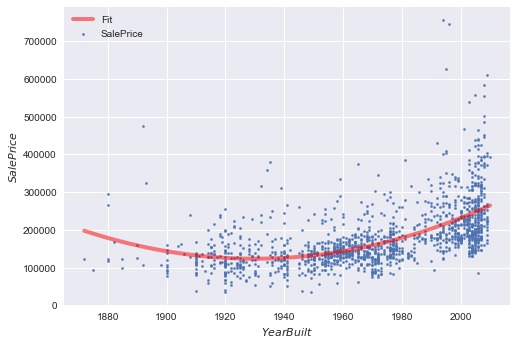

In [159]:
get_plot()

## 隨堂練習：在上圖加入 d=3 的線

In [164]:
def get_plot():
    y_arrays = []
    for d in [2, 3]:
        X_train = train_dict[d]
        X_validation = validation_dict[d]
        regressor = linear_model.LinearRegression()
        #fit
        regressor.fit(X_train, Y_train)
        prediction_on_training = regressor.predict(X_train)
        prediction_on_validation = regressor.predict(X_validation)
        x_arr = np.linspace(train["YearBuilt"].min(), train["YearBuilt"].max(), num=1000)
        x_arr_poly = PolynomialFeatures(d).fit_transform(x_arr.reshape(-1, 1))
        y_arr = regressor.predict(x_arr_poly)
        y_arrays.append(y_arr)
    plt.scatter(train["YearBuilt"], train["SalePrice"], s=5)
    plt.plot(x_arr, y_arrays[0], 'r-', alpha=0.5, label = "Degree={}".format(2), linewidth=3)
    plt.plot(x_arr, y_arrays[1], 'g-', alpha=0.5, label = "Degree={}".format(3), linewidth=3)
    plt.xlabel('$YearBuilt$');
    plt.ylabel('$SalePrice$')
    plt.legend(loc="upper left")
    plt.show()

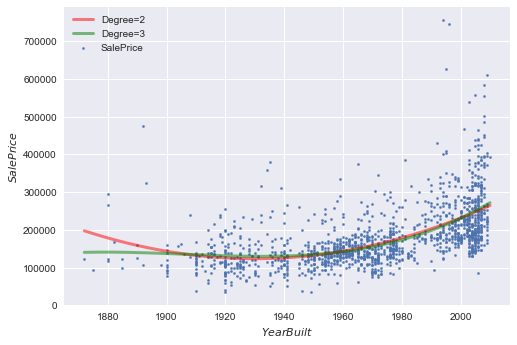

In [165]:
get_plot()

## 增加次方項的影響

|Bias|Variance|Fitting|Degree|
|----|--------|-------|------|
|High|Low|Under-fitting|Low Complexity|
|Medium|Medium|Appropriate fitting|Medium Complexity|
|Low|High|Over-fitting|High Complexity|

## 在不設定 `random_state` 參數的情況下切割訓練與驗證樣本

In [169]:
# 切割訓練與驗證樣本
train_df, validation_df = train_test_split(train, test_size=0.3)
Y_train = train_df["SalePrice"].values.reshape(-1, 1)
X_train = train_df["YearBuilt"].values.reshape(-1, 1)
Y_validation = validation_df["SalePrice"].values.reshape(-1, 1)
X_validation = validation_df["YearBuilt"].values.reshape(-1, 1)

PolynomialFeatures(3).fit_transform(X_train)
degrees = range(11)
train_dict, validation_dict = make_features(X_train, X_validation, degrees)

best_degree, error_validation, error_train = get_best_degree()

print("Validation Error:\n")
print(error_validation)
print("\nError 最低的次方是 {}".format(best_degree))

Validation Error:

[6.32797667e+09 4.86523796e+09 4.39813360e+09 4.42115033e+09
 4.42088904e+09 4.42062740e+09 4.42036646e+09 4.42010715e+09
 4.41985042e+09 4.41959725e+09 4.41934864e+09]

Error 最低的次方是 2


In [170]:
plt.plot(degrees, error_train, marker='o', label='train')
plt.plot(degrees, error_validation, marker='o', label='validation')
plt.axvline(best_degree, 0, 0.5, color='r', label="Minimum validation error at d={}".format(best_degree), alpha=0.3)
plt.ylabel('MSE')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

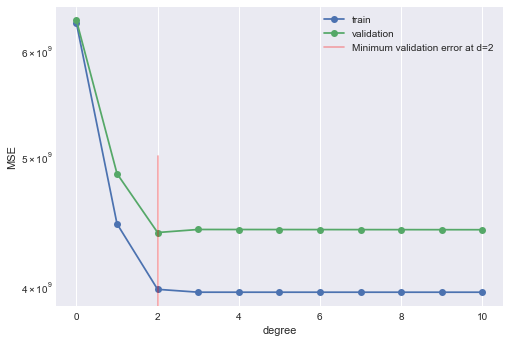

In [171]:
plt.show()

## 重複執行前面的程式碼

發現驗證資料的 MSE 每次都不一樣，這是什麼緣故？